## A/B testing

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ab_data = pd.read_csv('data/ab_data.csv', sep=',')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [43]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [44]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d') # Переводим признак в формат datetime

In [45]:
# Cгруппируем наши данные по дате и группе и вычислить количество пользователей, 
# заходивших на сайт, и суммарное количество совершённых целевых действий. 
daily_data = ab_data.groupby(['timestamp','group']).agg(
    {'user_id': 'count',
     'converted': 'sum'
}).reset_index().rename(columns={'user_id':'user_count'})

daily_data.head(7)

,timestamp,group,user_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797
5,2017-01-04,B,6538,763
6,2017-01-05,A,6419,791


### TASK 4.1

In [46]:
daily_data['conversion'] = daily_data['converted']/daily_data['user_count']*100

daily_data.head()

,timestamp,group,user_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361


In [47]:
conv_a = daily_data[(daily_data['timestamp']=='2017-01-05') & (daily_data['group']=='A')]['conversion']
print(round(conv_a,2))

6    12.32
Name: conversion, dtype: float64


### Visual analysis of conversion in groups

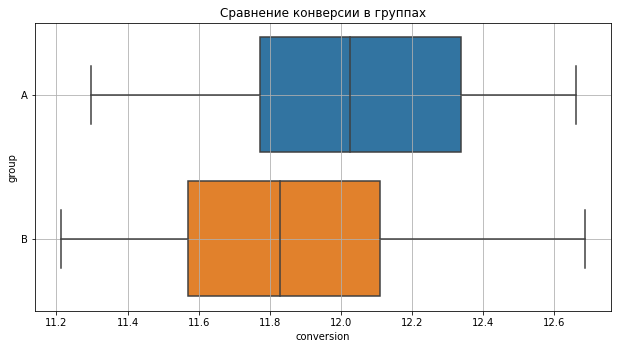

In [48]:
# create the figure size 8x4
fig = plt.figure(figsize=(8,4))
# add axes
ax = fig.add_axes([1,1,1,1])
# create boxplot for conversion based on group
sns.boxplot(
    data = daily_data,
    x='conversion',
    y='group',
    ax=ax )

ax.set_title('Сравнение конверсии в группах')
ax.grid()

In [49]:
conversion_piv = daily_data.groupby(['group'])['conversion'].agg(
    ['median','mean']
)

conversion_piv

,median,mean
group,,
A,12.024261,12.032876
B,11.829582,11.872697


### Cumulative metrics

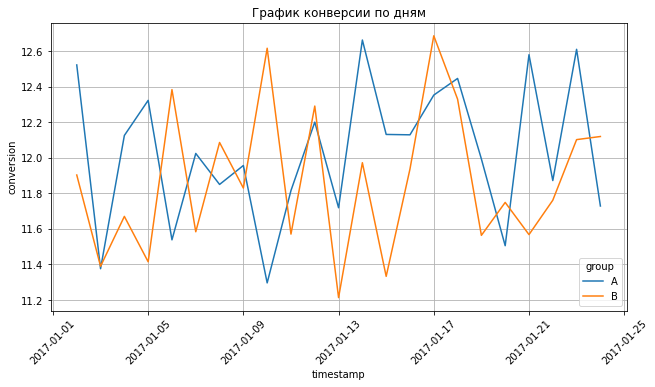

In [50]:
# Create a line plot
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])

sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group',
    ax=ax
)

ax.set_title('График конверсии по дням')
ax.xaxis.set_tick_params(rotation=45)
ax.grid()

In [51]:
# select data of group A
daily_data_a = daily_data[daily_data['group']=='A']
# counting the cumulative number of visitors
daily_data_a.loc[:,'cum_users_count'] = daily_data_a['user_count'].cumsum()
# output the time, the number of visitors and the cumulative of visitors
display(daily_data_a[['timestamp','user_count','cum_users_count']].head())

C:\Users\Alex\AppData\Local\Temp\ipykernel_16488\2712106599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:,'cum_users_count'] = daily_data_a['user_count'].cumsum()


,timestamp,user_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


#### Cumulative conversion

In [52]:
# count cumulative sum number of visitors
daily_data['cum_users_count'] = daily_data.groupby(['group'])['user_count'].cumsum()
# count cumulative sum number of actions
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# count cumulative conversion
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count']*100

daily_data.head()

,timestamp,group,user_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


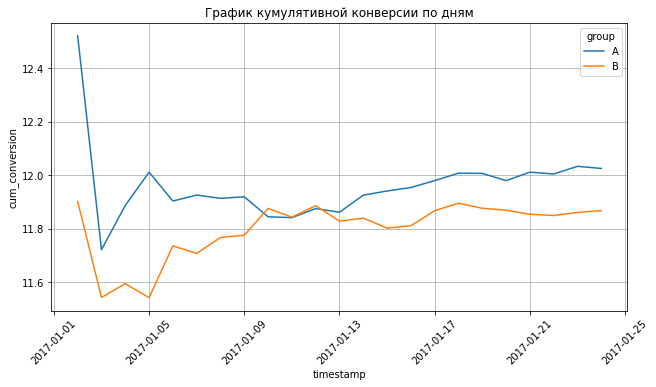

In [53]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='cum_conversion',
    hue='group',
    ax=ax
)

ax.set_title('График кумулятивной конверсии по дням')
ax.xaxis.set_tick_params(rotation=45)
ax.grid(True)

### TASK 4.6

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px

sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv', sep=',')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv', sep=',') 

display(sample_a.head())
display(sample_b.head())

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B


In [56]:
sample_a['date'] = pd.to_datetime(sample_a['date'])
sample_b['date'] = pd.to_datetime(sample_b['date'])

# for sample_a
sample_a_grouped = sample_a.groupby(['date']).agg({
    'cid': 'count',
    'transactions': 'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid':'visitors_qtn','transactions':'transactions_qtn','revenue':'revenue_qtn'})

sample_a_grouped.head()

,date,visitors_qtn,transactions_qtn,revenue_qtn
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984


In [57]:
# for sample_b
sample_b_grouped = sample_b.groupby(['date']).agg({
    'cid': 'count',
    'transactions': 'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid':'visitors_qtn','transactions':'transactions_qtn','revenue':'revenue_qtn'})

sample_b_grouped.head()

,date,visitors_qtn,transactions_qtn,revenue_qtn
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842
3,2020-11-09,3062,25,1285836
4,2020-11-10,3072,30,2414726


In [58]:
sample_a_grouped[sample_a_grouped['date']=='2020-11-08']

,date,visitors_qtn,transactions_qtn,revenue_qtn
2,2020-11-08,3354,25,846051


### TASK 4.7

In [59]:
sample_a_grouped['cum_visitors'] = sample_a_grouped['visitors_qtn'].cumsum()
sample_a_grouped['cum_transactions'] = sample_a_grouped['transactions_qtn'].cumsum()
sample_a_grouped['cum_revenue'] = sample_a_grouped['revenue_qtn'].cumsum()
sample_a_grouped['cum_conversion_transaction'] = sample_a_grouped['cum_transactions']/sample_a_grouped['cum_visitors']*100
sample_a_grouped['cum_conversion_transaction'] = round(sample_a_grouped['cum_transactions']/sample_a_grouped['cum_visitors']*100,2)
sample_a_grouped['cum_conversion_revenue'] = round(sample_a_grouped['cum_revenue']/sample_a_grouped['cum_transactions']*100,2)

sample_a_grouped.head()

,date,visitors_qtn,transactions_qtn,revenue_qtn,cum_visitors,cum_transactions,cum_revenue,cum_conversion_transaction,cum_conversion_revenue
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.62,9857993.75
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.74,8459397.44
2,2020-11-08,3354,25,846051,8634,64,4145216,0.74,6476900.00
3,2020-11-09,3234,18,708830,11868,82,4854046,0.69,5919568.29
4,2020-11-10,3022,29,826984,14890,111,5681030,0.75,5118045.05


In [60]:
sample_b_grouped['cum_visitors'] = sample_b_grouped['visitors_qtn'].cumsum()
sample_b_grouped['cum_transactions'] = sample_b_grouped['transactions_qtn'].cumsum()
sample_b_grouped['cum_revenue'] = sample_b_grouped['revenue_qtn'].cumsum()
sample_b_grouped['cum_conversion_transaction'] = sample_b_grouped['cum_transactions']/sample_b_grouped['cum_visitors']*100
sample_b_grouped['cum_conversion_transaction'] = round(sample_b_grouped['cum_transactions']/sample_b_grouped['cum_visitors']*100,2)
sample_b_grouped['cum_conversion_revenue'] = round(sample_b_grouped['cum_revenue']/sample_b_grouped['cum_transactions']*100,2)

sample_b_grouped.head()

,date,visitors_qtn,transactions_qtn,revenue_qtn,cum_visitors,cum_transactions,cum_revenue,cum_conversion_transaction,cum_conversion_revenue
0,2020-11-06,2499,19,996645,2499,19,996645,0.76,5245500.00
1,2020-11-07,2804,19,555499,5303,38,1552144,0.72,4084589.47
2,2020-11-08,3291,24,3044842,8594,62,4596986,0.72,7414493.55
3,2020-11-09,3062,25,1285836,11656,87,5882822,0.75,6761864.37
4,2020-11-10,3072,30,2414726,14728,117,8297548,0.79,7091921.37


In [61]:
round(sample_a_grouped['cum_conversion_transaction'].mean(),2)

0.71

In [62]:
round(sample_b_grouped['cum_conversion_transaction'].mean(),2)

0.76

### TASK 4.8

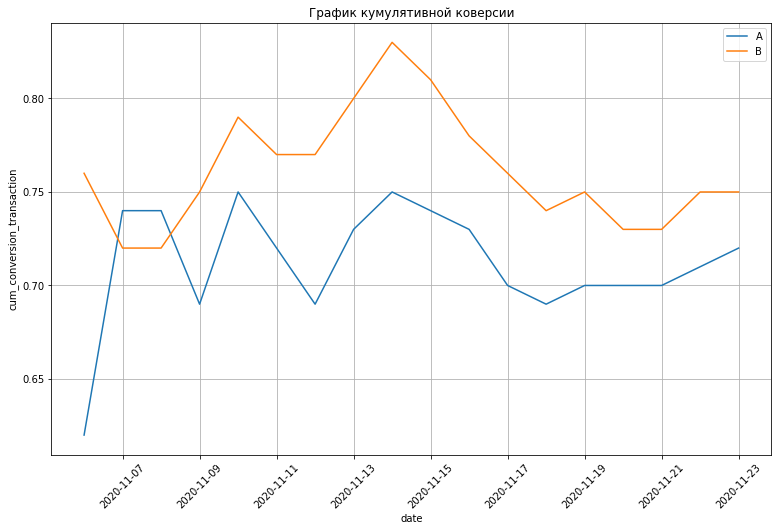

In [63]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([1, 1, 1, 1])

sns.lineplot(
    data=sample_a_grouped,
    x = 'date',
    y = 'cum_conversion_transaction',
    label="A",
)


sns.lineplot(
    data=sample_b_grouped,
    x = 'date',
    y = 'cum_conversion_transaction',
    label="B",
)


ax.set_title('График кумулятивной коверсии')
ax.xaxis.set_tick_params(rotation = 45)
ax.grid(True)

### TASK 4.9

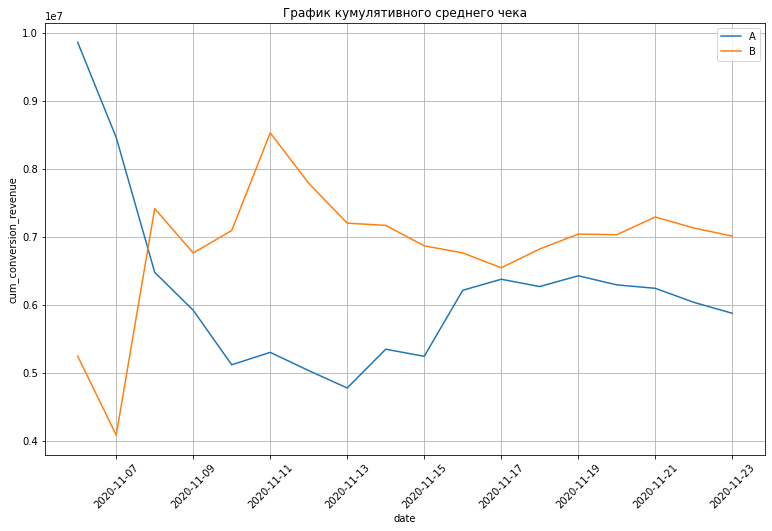

In [64]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([1, 1, 1, 1])

sns.lineplot(
    data=sample_a_grouped,
    x = 'date',
    y = 'cum_conversion_revenue',
    label="A"
)


sns.lineplot(
    data=sample_b_grouped,
    x = 'date',
    y = 'cum_conversion_revenue',
    label="B"
)


ax.set_title('График кумулятивного среднего чека')
ax.xaxis.set_tick_params(rotation = 45)
ax.grid(True)